In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt   # For visualization

sns.set(style='ticks', context='talk')
na_values = ['NO CLUE', 'N/A', '0']

In [ ]:
#create train dataset
spam_psy = pd.read_csv("D:\\Download\\MachineLearning\\Youtube01-Psy.csv")
spam_kattyperry = pd.read_csv("D:\\Download\\MachineLearning\\Youtube02-KatyPerry.csv")
spam_LMFAO = pd.read_csv("D:\\Download\\MachineLearning\\Youtube03-LMFAO.csv")
raw_data = pd.concat([spam_psy,spam_kattyperry,spam_LMFAO])

In [ ]:
raw_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
raw_data.shape

(1138, 5)

In [ ]:
spam_dict = ["check my video", "Follow me", "watch my videos","subscribe","Please share","Check out","my channel","my page",
            "giftcard","promos","sex","channel","new track","ATTENTION","HTTP","subs","check","like them","new album","Hack",
            "VOTE","please listen","join me","help me","help","youtube","gay","share","fuck","make money","visit","Donate",
            "trailer","free","channel","instagram","facebook","soundcloud","support","website"]

In [ ]:
stop_words = [ "a","i","me","my","we","our","for", "ours","ourselves", "you", "your","yourself","yourselves", "he","him",
              "his", "himself","her","hers", "herself","it", "its", "itself","them","their", "theirs","themselves", "what",
              "which","whom","this", "that","these", "those", "am","are","was", "were","be", "been", "being","has","had",
              "having","do", "does", "did","would","should", "could","ought", "i'm", "you're","she's","it's", "we're",
              "they're", "i've", "you've","they've","i'd", "you'd","he'd", "she'd", "we'd","i'll","you'll", "he'll","she'll",
              "we'll", "they'll","aren't","wasn't", "weren't","hasn't", "haven't", "hadn't","don't","didn't", "won't","wouldn't"
              , "shan't", "shouldn't","cannot","couldn't", "mustn't","let's", "that's", "who's","here's","there's", "when's"
              ,"where's", "why's", "how's","an","the", "and","but", "if", "or","as","until", "while","of", "at", "by","with",
              "about", "against","between", "into", "through","before","after", "above","below", "to", "from","down","in",
              "out","on", "off", "over","again","further", "then","once", "here", "there","where","why", "how","all", "any",
              "both","few","more", "most","other", "some", "such","nor","not", "only","own", "same", "so","too","very"]

In [ ]:
# init new data from origin data
filted_data = pd.DataFrame()

In [ ]:
filted_data["CLASS"] = raw_data["CLASS"]

In [ ]:
#remove "stop word" from content and save in column CONTENT_FILTER
filted_data["CONTENT_FILTER"] = raw_data['CONTENT'].str.lower().apply(lambda x: [word for word in str.split(x) if word not in stop_words])

<Axes: xlabel='CLASS', ylabel='IS_URL'>

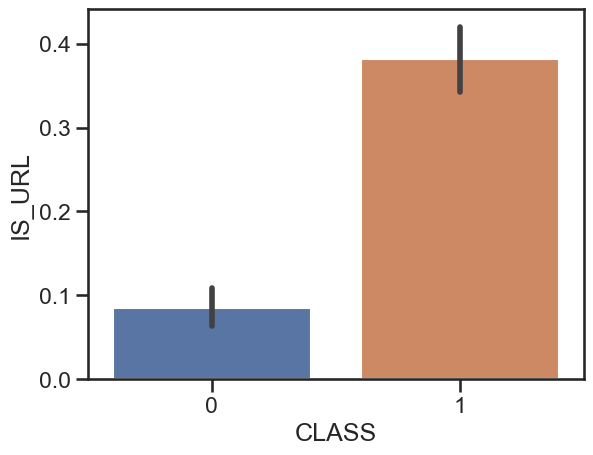

In [ ]:
filted_data['IS_URL'] = raw_data['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))
sns.barplot(x='CLASS', y='IS_URL', data=filted_data)

<Axes: xlabel='CLASS', ylabel='COMMENT_LEN'>

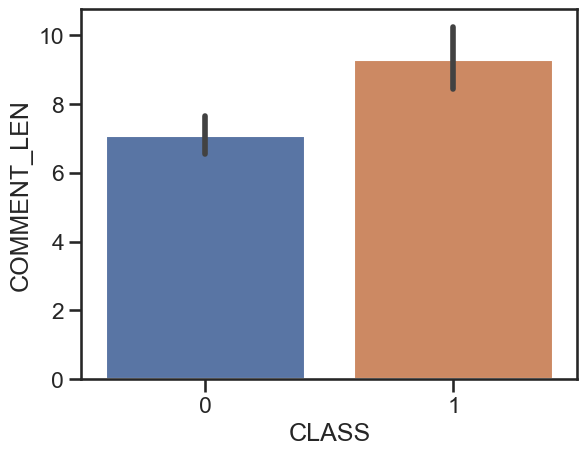

In [ ]:
# Get len of comment and save in COMMENT_LEN
filted_data["COMMENT_LEN"] = filted_data["CONTENT_FILTER"].str.len()
sns.barplot(data=filted_data,y="COMMENT_LEN",x="CLASS")

<Axes: xlabel='CLASS', ylabel='SPAM_COUNT'>

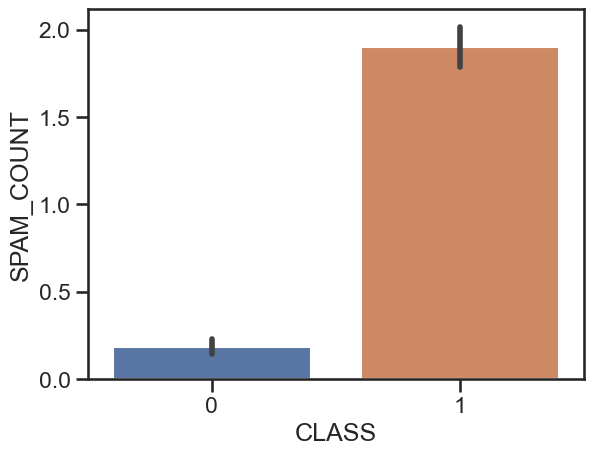

In [ ]:
# Count the number of spam words in the comment using the spam dictionary
filted_data['SPAM_COUNT'] = raw_data['CONTENT'].str.upper().str.count(str.upper("|".join(spam_dict)))
sns.barplot(x="CLASS",y="SPAM_COUNT",data=filted_data)

<Axes: xlabel='CLASS', ylabel='RATIO_SPM_WORD'>

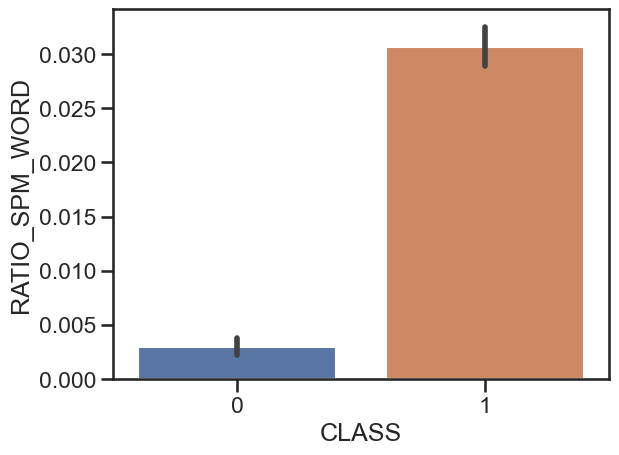

In [ ]:
# Get ratio of spam word over total number of word after filter
filted_data["RATIO_SPM_WORD"] = filter_data["SPAM_COUNT"]/filter_data["COMMENT_LEN"]
sns.barplot(x="CLASS",y="RATIO_SPM_WORD",data = filted_data)

In [ ]:
# filted_data['SPAM_LEN'] = np.where(filted_data['COMMENT_LEN'] > 50, 1, 0)

In [ ]:
filter_data.head()

,CONTENT_FILTER,COMMENT_LEN,CLASS,RATIO_SPM_WORD,IS_URL,SPAM_COUNT
0,"[huh,, anyway, check, you[tube], channel:, kob...",56,1,0.166667,False,2
1,"[hey, guys, check, new, channel, first, vid, i...",166,1,0.111111,True,3
2,"[just, test, have, say, murdev.com]",38,1,0.000000,True,0
3,"[shaking, sexy, ass, channel, enjoy, ^_^, ﻿]",48,1,0.142857,False,2
4,"[watch?v=vtarggvgtwq, check, .﻿]",39,1,0.333333,False,1


In [ ]:
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
#init validation dataset
spam_Emnm = pd.read_csv("D:\\Download\\MachineLearning\\Youtube04-Eminem.csv")
filted_spam_Emnm = pd.DataFrame()
filted_spam_Emnm["CLASS"] = spam_Emnm["CLASS"].astype('category')
filted_spam_Emnm["CONTENT_FILTER"] = spam_Emnm['CONTENT'].str.lower().apply(lambda x: [word for word in str.split(x) if word not in stop_words])
filted_spam_Emnm['IS_URL'] = spam_Emnm['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))
filted_spam_Emnm["COMMENT_LEN"] = filted_spam_Emnm["CONTENT_FILTER"].str.len()
filted_spam_Emnm['SPAM_COUNT'] = spam_Emnm['CONTENT'].str.upper().str.count(str.upper("|".join(spam_dict)))
filted_spam_Emnm["RATIO_SPM_WORD"] = filted_spam_Emnm['SPAM_COUNT']/filted_spam_Emnm["COMMENT_LEN"]
# filted_spam_Emnm['SPAM_LEN'] = np.where(filted_spam_Emnm['COMMENT_LEN'] > 50, 1, 0)
filted_spam_Emnm.head()

,CLASS,CONTENT_FILTER,IS_URL,COMMENT_LEN,SPAM_COUNT,RATIO_SPM_WORD
0,1,"[+447935454150, lovely, girl, talk, xxx﻿]",False,5,0,0.000000
1,0,"[always, end, up, coming, back, song<br, />﻿]",True,7,0,0.000000
2,1,"[sister, just, received, 6,500, new, <a, rel=""...",True,18,2,0.111111
3,0,[cool﻿],False,1,0,0.000000
4,1,"[hello, i&#39;am, palastine﻿]",False,3,0,0.000000


In [ ]:
filted_spam_Emnm.shape

(448, 7)

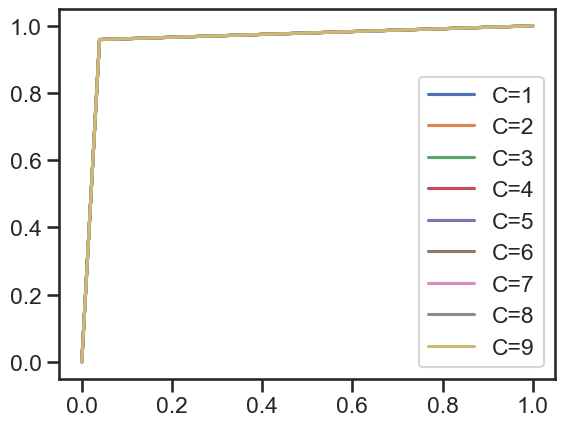

In [ ]:
from sklearn import metrics
plt.figure(0).clf()
for C in range(1,10):
    svc = svm.SVC(kernel='rbf', C=1000).fit(filted_data.values[:,(2,4,5)], filter_data.CLASS)
    predicted_svm = svc.predict(filted_spam_Emnm.values[:,(2,4,5)])
    fpr,tpr,threshold = metrics.roc_curve(filted_spam_Emnm.CLASS,predicted_svm)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,tpr,label = "C="+str(C))
plt.legend()
plt.show()

In [ ]:
# init test dataset
spam_shakira = pd.read_csv('D:\\Download\\MachineLearning\\Youtube05-Shakira.csv')
filted_spam_shakira = pd.DataFrame()
filted_spam_shakira["CLASS"] = spam_shakira["CLASS"].astype('category')
filted_spam_shakira["CONTENT_FILTER"] = spam_shakira['CONTENT'].str.lower().apply(lambda x: [word for word in str.split(x) if word not in stop_words])
filted_spam_shakira['IS_URL'] = spam_shakira['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))
filted_spam_shakira["COMMENT_LEN"] = filted_spam_shakira["CONTENT_FILTER"].str.len()
filted_spam_shakira['SPAM_COUNT'] = spam_shakira['CONTENT'].str.upper().str.count(str.upper("|".join(spam_dict)))
filted_spam_shakira["RATIO_SPM_WORD"] = filted_spam_shakira['SPAM_COUNT']/filted_spam_shakira["COMMENT_LEN"]
filted_spam_shakira['SPAM_LEN'] = np.where(filted_spam_shakira['COMMENT_LEN'] > 50, 1, 0)
filted_spam_shakira.head()

,CLASS,CONTENT_FILTER,IS_URL,COMMENT_LEN,SPAM_COUNT,RATIO_SPM_WORD,SPAM_LEN
0,0,"[nice, song﻿]",False,2,0,0.000000,0
1,0,"[love, song, ﻿]",False,3,0,0.000000,0
2,0,"[love, song, ﻿]",False,3,0,0.000000,0
3,0,"[860,000,000, lets, make, first, female, reach...",False,12,1,0.083333,0
4,0,"[shakira, is, best, worldcup﻿]",False,4,0,0.000000,0


In [ ]:
filted_spam_shakira.shape

(370, 7)

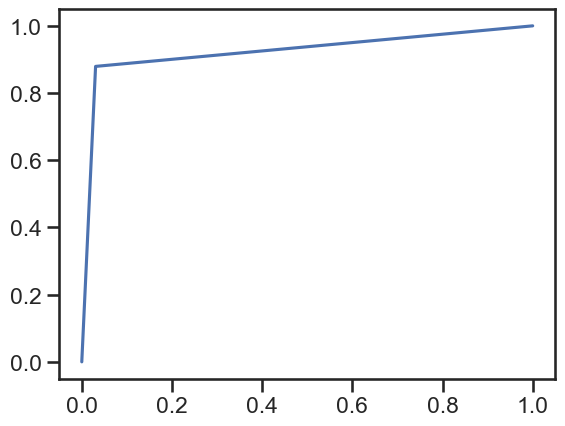

In [ ]:
svc = svm.SVC(kernel='rbf', C=9.0).fit(filted_data.values[:,(2,4,5)], filted_data.CLASS)
predicted_svm = svc.predict(filted_spam_shakira.values[:,(2,4,5)])
fpr,tpr,threshold = metrics.roc_curve(filted_spam_shakira.CLASS,predicted_svm)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label = "C="+str(C))
# plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(filted_spam_shakira.CLASS, predicted_svm,labels=svc.classes_)

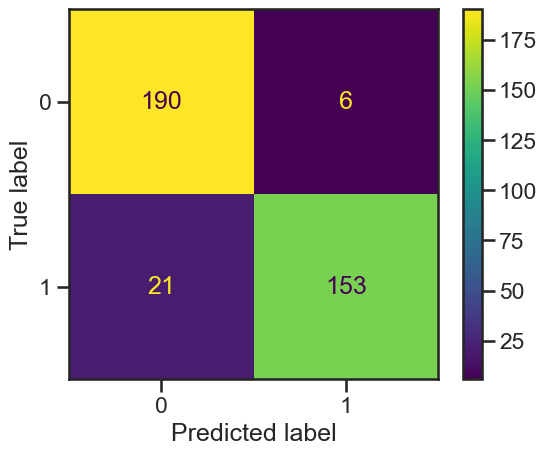

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()
plt.show()

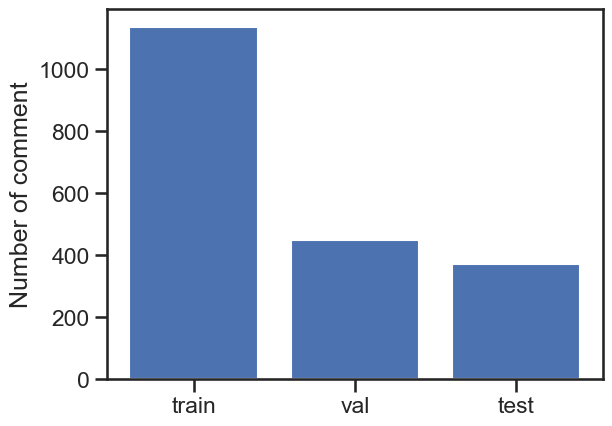

In [ ]:
Y = [1138,448,370]
X = ["train","val","test"]
plt.bar(X,Y)
plt.ylabel("Number of comment")
plt.plot()
plt.show()

In [ ]:
print(1138/(1138+448+370))

0.581799591002045


In [ ]:
print(448/(1138+448+370))

0.22903885480572597


In [ ]:
print(370/(1138+448+370))

0.18916155419222905


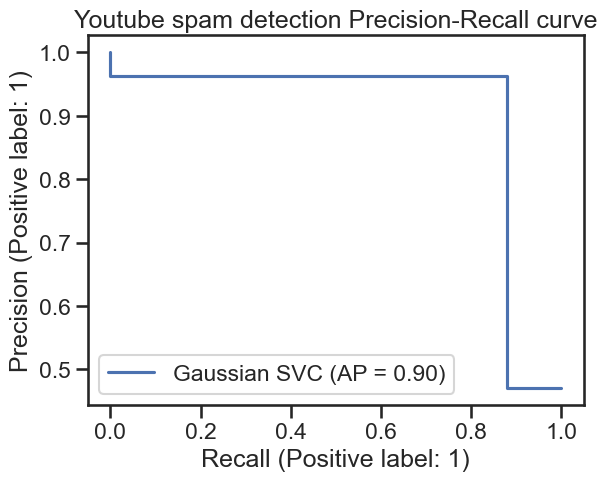

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(
    filted_spam_shakira.CLASS, predicted_svm, name="Gaussian SVC",
)
_ = display.ax_.set_title("Youtube spam detection Precision-Recall curve")